<a href="https://colab.research.google.com/github/Yash0411/Machine-Learning-initial-projects/blob/master/Traffic_sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
from google.colab import files
files.upload() #upload kaggle.json
 
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
!kaggle datasets download -d eunjurho/german-traffic-sign-recognition-benchmark-cropped

100% 205M/206M [00:03<00:00, 105MB/s] 
100% 206M/206M [00:03<00:00, 60.4MB/s]


In [4]:
!unzip -q /content/german-traffic-sign-recognition-benchmark-cropped.zip -d .
!ls

german-traffic-sign-recognition-benchmark-cropped.zip  kaggle.json
gtsrb-preprocessed				       sample_data


In [5]:
import os

training_dir = os.listdir('/content/gtsrb-preprocessed/train')
testing_dir = os.listdir('/content/gtsrb-preprocessed/test')

print(len(training_dir))
print(len(testing_dir))


43
12630


In [0]:
os.mkdir("/content/train/")
os.mkdir("/content/test/")

In [0]:
for i in training_dir:
  os.mkdir("/content/train/"+i)
  os.mkdir("/content/test/"+i)

In [0]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    
    files = []
    
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + "is zero so ignoring length")
            
    
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) * (1 - SPLIT_SIZE))
    shuffeled_set = random.sample (files, len(files))
    training_set = shuffeled_set[0 : training_length]
    testing_set = shuffeled_set[~testing_length : ]
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
        
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination) 


for i in training_dir:
  split_data("/content/gtsrb-preprocessed/train/"+i+"/", "/content/train/"+i+"/", "/content/test/"+i+"/", 0.96)

  print(len(os.listdir('/content/train/'+i)))
  print(len(os.listdir('/content/test/'+i)))

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units = 43, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [10]:
TRAINING_DIR = "/content/train"
train_datagen = ImageDataGenerator( rescale=1./255.)

training_set = train_datagen.flow_from_directory(TRAINING_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')




VALIDATION_DIR = "/content/test"
validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

test_set = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 37624 images belonging to 43 classes.
Found 1593 images belonging to 43 classes.


In [11]:
history = classifier.fit_generator(training_set,
                         epochs = 32,
                         validation_data = test_set)

Epoch 1/32
1176/1176 [==============================] - 32s 28ms/step - loss: 0.7708 - accuracy: 0.7855 - val_loss: 0.1957 - val_accuracy: 0.9473
Epoch 2/32
1176/1176 [==============================] - 25s 22ms/step - loss: 0.1291 - accuracy: 0.9665 - val_loss: 0.0148 - val_accuracy: 0.9667
Epoch 3/32
1176/1176 [==============================] - 25s 22ms/step - loss: 0.0806 - accuracy: 0.9783 - val_loss: 0.0907 - val_accuracy: 0.9749
Epoch 4/32
1176/1176 [==============================] - 26s 22ms/step - loss: 0.0567 - accuracy: 0.9845 - val_loss: 0.0014 - val_accuracy: 0.9837
Epoch 5/32
1176/1176 [==============================] - 25s 22ms/step - loss: 0.0492 - accuracy: 0.9864 - val_loss: 0.0195 - val_accuracy: 0.9900
Epoch 6/32
1176/1176 [==============================] - 25s 21ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0131 - val_accuracy: 0.9812
Epoch 7/32
1176/1176 [==============================] - 25s 21ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0487 -

Text(0.5, 1.0, 'Training and validation loss')

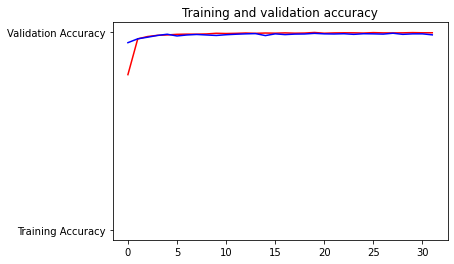

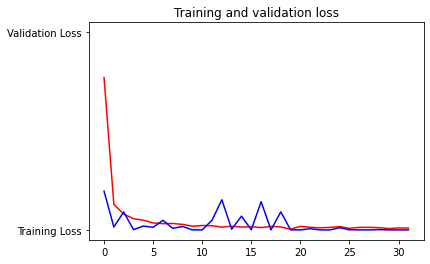

In [12]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
